### Spark Decision Tree

In [1]:
## 파일 불러오기
# show()를 통해서 볼 수 있음.
# 첫번째 줄이 제목이라면 hearder = True로 제목으로 만들어줌.
df = spark.read.csv('playtennis.csv', header = True)
df

DataFrame[Outlook: string, Temperature: string, Humidity: string, Wind: string, PlayTennis: string]

In [2]:
## Spark DataFrame
# 줄을 여러개 블럭으로 나눠서 저장한다.
# 처리할 때, 블록별로 동시에 시작해서 빠르다.
type(df)

pyspark.sql.dataframe.DataFrame

In [3]:
## 확인하기
# 현재 문자인데 숫자로 변경해야지 Decision Tree로 사용할 수 있다.
df.show()

+--------+-----------+--------+------+----------+
| Outlook|Temperature|Humidity|  Wind|PlayTennis|
+--------+-----------+--------+------+----------+
|   Sunny|        Hot|    High|  Weak|        No|
|   Sunny|        Hot|    High|Strong|        No|
|Overcast|        Hot|    High|  Weak|       Yes|
|    Rain|       Mild|    High|  Weak|       Yes|
|    Rain|       Cool|  Normal|  Weak|       Yes|
|    Rain|       Cool|  Normal|Strong|        No|
|Overcast|       Cool|  Normal|Strong|       Yes|
|   Sunny|       Mild|    High|  Weak|        No|
|   Sunny|       Cool|  Normal|  Weak|       Yes|
|    Rain|       Mild|  Normal|  Weak|       Yes|
|   Sunny|       Mild|  Normal|Strong|       Yes|
|Overcast|       Mild|    High|Strong|       Yes|
|Overcast|        Hot|  Normal|  Weak|       Yes|
|    Rain|       Mild|    High|Strong|        No|
+--------+-----------+--------+------+----------+



#### 컬럼값 수정

In [4]:
from pyspark.sql import functions as F

In [5]:
## Outlook데이터 변경하기
# df.withColumn : 컬럼 데이터를 수정해서 리턴한다.
# df.withColumn('Outlook', F.when(F.col('Outlook') == 'Sunny',0) : Outlook 컬럼의 값이 Sunny이면 0으로 수정해서 리턴한다.
# otherwise(F.col('Outlook')) :  조건이 거짓이면 Outlook 컬럼의 기존값을 리턴한다.
df = df.withColumn('Outlook', F.when(F.col('Outlook') == 'Sunny',0).otherwise(F.col('Outlook')))

In [6]:
## 데이터 확인하기
df.show()

+--------+-----------+--------+------+----------+
| Outlook|Temperature|Humidity|  Wind|PlayTennis|
+--------+-----------+--------+------+----------+
|       0|        Hot|    High|  Weak|        No|
|       0|        Hot|    High|Strong|        No|
|Overcast|        Hot|    High|  Weak|       Yes|
|    Rain|       Mild|    High|  Weak|       Yes|
|    Rain|       Cool|  Normal|  Weak|       Yes|
|    Rain|       Cool|  Normal|Strong|        No|
|Overcast|       Cool|  Normal|Strong|       Yes|
|       0|       Mild|    High|  Weak|        No|
|       0|       Cool|  Normal|  Weak|       Yes|
|    Rain|       Mild|  Normal|  Weak|       Yes|
|       0|       Mild|  Normal|Strong|       Yes|
|Overcast|       Mild|    High|Strong|       Yes|
|Overcast|        Hot|  Normal|  Weak|       Yes|
|    Rain|       Mild|    High|Strong|        No|
+--------+-----------+--------+------+----------+



In [7]:
## Outlook데이터 변경하기
# df.withColumn : 컬럼 데이터를 수정해서 리턴한다.
# df.withColumn('Outlook', F.when(F.col('Outlook') == 'Overcast',1) : Outlook 컬럼의 값이 Overcast이면 1으로 수정해서 리턴한다.
# otherwise(F.col('Outlook')) :  조건이 거짓이면 Outlook 컬럼의 기존값을 리턴한다.
df = df.withColumn('Outlook', F.when(F.col('Outlook') == 'Overcast',1).otherwise(F.col('Outlook')))

In [8]:
## Outlook데이터 변경하기
# df.withColumn : 컬럼 데이터를 수정해서 리턴한다.
# df.withColumn('Outlook', F.when(F.col('Outlook') == 'Rain',2) : Outlook 컬럼의 값이 Rain이면 2으로 수정해서 리턴한다.
# otherwise(F.col('Outlook')) :  조건이 거짓이면 Outlook 컬럼의 기존값을 리턴한다.
df = df.withColumn('Outlook', F.when(F.col('Outlook') == 'Rain',2).otherwise(F.col('Outlook')))

In [9]:
## Outlook데이터 확인하기
df.show()

+-------+-----------+--------+------+----------+
|Outlook|Temperature|Humidity|  Wind|PlayTennis|
+-------+-----------+--------+------+----------+
|      0|        Hot|    High|  Weak|        No|
|      0|        Hot|    High|Strong|        No|
|      1|        Hot|    High|  Weak|       Yes|
|      2|       Mild|    High|  Weak|       Yes|
|      2|       Cool|  Normal|  Weak|       Yes|
|      2|       Cool|  Normal|Strong|        No|
|      1|       Cool|  Normal|Strong|       Yes|
|      0|       Mild|    High|  Weak|        No|
|      0|       Cool|  Normal|  Weak|       Yes|
|      2|       Mild|  Normal|  Weak|       Yes|
|      0|       Mild|  Normal|Strong|       Yes|
|      1|       Mild|    High|Strong|       Yes|
|      1|        Hot|  Normal|  Weak|       Yes|
|      2|       Mild|    High|Strong|        No|
+-------+-----------+--------+------+----------+



In [10]:
## Temperature데이터 변경하기
# df.withColumn : 컬럼 데이터를 수정해서 리턴한다.
# df.withColumn('Temperature', F.when(F.col('Temperature') == 'Hot',0) : Temperature컬럼의 값이 Hot이면 0으로 수정해서 리턴한다.
# otherwise(F.col('Temperature')) :  조건이 거짓이면 Temperature 컬럼의 기존값을 리턴한다.
df = df.withColumn('Temperature', F.when(F.col('Temperature') == 'Hot',0).otherwise(F.col('Temperature')))

In [11]:
## Temperature데이터 변경하기
# df.withColumn : 컬럼 데이터를 수정해서 리턴한다.
# df.withColumn('Temperature', F.when(F.col('Temperature') == 'Mild',1) : Temperature컬럼의 값이 Mild이면 1으로 수정해서 리턴한다.
# otherwise(F.col('Temperature')) :  조건이 거짓이면 Temperature 컬럼의 기존값을 리턴한다.
df = df.withColumn('Temperature', F.when(F.col('Temperature') == 'Mild',1).otherwise(F.col('Temperature')))

In [12]:
## Temperature데이터 변경하기
# df.withColumn : 컬럼 데이터를 수정해서 리턴한다.
# df.withColumn('Temperature', F.when(F.col('Temperature') == 'Cool',2) : Temperature컬럼의 값이 Cool이면 2으로 수정해서 리턴한다.
# otherwise(F.col('Temperature')) :  조건이 거짓이면 Temperature 컬럼의 기존값을 리턴한다.
df = df.withColumn('Temperature', F.when(F.col('Temperature') == 'Cool',2).otherwise(F.col('Temperature')))

In [13]:
## Temperature데이터 확인하기
df.show()

+-------+-----------+--------+------+----------+
|Outlook|Temperature|Humidity|  Wind|PlayTennis|
+-------+-----------+--------+------+----------+
|      0|          0|    High|  Weak|        No|
|      0|          0|    High|Strong|        No|
|      1|          0|    High|  Weak|       Yes|
|      2|          1|    High|  Weak|       Yes|
|      2|          2|  Normal|  Weak|       Yes|
|      2|          2|  Normal|Strong|        No|
|      1|          2|  Normal|Strong|       Yes|
|      0|          1|    High|  Weak|        No|
|      0|          2|  Normal|  Weak|       Yes|
|      2|          1|  Normal|  Weak|       Yes|
|      0|          1|  Normal|Strong|       Yes|
|      1|          1|    High|Strong|       Yes|
|      1|          0|  Normal|  Weak|       Yes|
|      2|          1|    High|Strong|        No|
+-------+-----------+--------+------+----------+



In [14]:
## Humidity데이터 변경하기
# df.withColumn : 컬럼 데이터를 수정해서 리턴한다.
# df.withColumn('Humidity', F.when(F.col('Humidity') == 'High',0) : Humidity컬럼의 값이 High이면 0으로 수정해서 리턴한다.
# otherwise(F.col('Humidity')) :  조건이 거짓이면 Humidity 컬럼의 기존값을 리턴한다.
df = df.withColumn('Humidity', F.when(F.col('Humidity') == 'High',0).otherwise(F.col('Humidity')))

In [15]:
## Humidity데이터 변경하기
# df.withColumn : 컬럼 데이터를 수정해서 리턴한다.
# df.withColumn('Humidity', F.when(F.col('Humidity') == 'Normal',1) : Humidity컬럼의 값이 Normal이면 1으로 수정해서 리턴한다.
# otherwise(F.col('Humidity')) :  조건이 거짓이면 Humidity 컬럼의 기존값을 리턴한다.
df = df.withColumn('Humidity', F.when(F.col('Humidity') == 'Normal',1).otherwise(F.col('Humidity')))

In [16]:
## Humidity데이터 확인하기
df.show()

+-------+-----------+--------+------+----------+
|Outlook|Temperature|Humidity|  Wind|PlayTennis|
+-------+-----------+--------+------+----------+
|      0|          0|       0|  Weak|        No|
|      0|          0|       0|Strong|        No|
|      1|          0|       0|  Weak|       Yes|
|      2|          1|       0|  Weak|       Yes|
|      2|          2|       1|  Weak|       Yes|
|      2|          2|       1|Strong|        No|
|      1|          2|       1|Strong|       Yes|
|      0|          1|       0|  Weak|        No|
|      0|          2|       1|  Weak|       Yes|
|      2|          1|       1|  Weak|       Yes|
|      0|          1|       1|Strong|       Yes|
|      1|          1|       0|Strong|       Yes|
|      1|          0|       1|  Weak|       Yes|
|      2|          1|       0|Strong|        No|
+-------+-----------+--------+------+----------+



In [17]:
## Wind데이터 변경하기
# df.withColumn : 컬럼 데이터를 수정해서 리턴한다.
# df.withColumn('Wind', F.when(F.col('Wind') == 'Weak',0) : Wind컬럼의 값이 Weak이면 0으로 수정해서 리턴한다.
# otherwise(F.col('Wind')) :  조건이 거짓이면 Wind 컬럼의 기존값을 리턴한다.
df = df.withColumn('Wind', F.when(F.col('Wind') == 'Weak',0).otherwise(F.col('Wind')))

In [18]:
## Wind데이터 변경하기
# df.withColumn : 컬럼 데이터를 수정해서 리턴한다.
# df.withColumn('Wind', F.when(F.col('Wind') == 'Strong',1) : Wind컬럼의 값이 Strong이면 1으로 수정해서 리턴한다.
# otherwise(F.col('Wind')) :  조건이 거짓이면 Wind 컬럼의 기존값을 리턴한다.
df = df.withColumn('Wind', F.when(F.col('Wind') == 'Strong',1).otherwise(F.col('Wind')))

In [19]:
## Wind데이터 확인하기
df.show()

+-------+-----------+--------+----+----------+
|Outlook|Temperature|Humidity|Wind|PlayTennis|
+-------+-----------+--------+----+----------+
|      0|          0|       0|   0|        No|
|      0|          0|       0|   1|        No|
|      1|          0|       0|   0|       Yes|
|      2|          1|       0|   0|       Yes|
|      2|          2|       1|   0|       Yes|
|      2|          2|       1|   1|        No|
|      1|          2|       1|   1|       Yes|
|      0|          1|       0|   0|        No|
|      0|          2|       1|   0|       Yes|
|      2|          1|       1|   0|       Yes|
|      0|          1|       1|   1|       Yes|
|      1|          1|       0|   1|       Yes|
|      1|          0|       1|   0|       Yes|
|      2|          1|       0|   1|        No|
+-------+-----------+--------+----+----------+



In [20]:
## PlayTennis데이터 변경하기
# df.withColumn : 컬럼 데이터를 수정해서 리턴한다.
# df.withColumn('PlayTennis', F.when(F.col('PlayTennis') == 'No',0) : PlayTennis컬럼의 값이 No이면 0으로 수정해서 리턴한다.
# otherwise(F.col('PlayTennis')) :  조건이 거짓이면 PlayTennis 컬럼의 기존값을 리턴한다.
df = df.withColumn('PlayTennis', F.when(F.col('PlayTennis') == 'No',0).otherwise(F.col('PlayTennis')))

In [21]:
## PlayTennis데이터 변경하기
# df.withColumn : 컬럼 데이터를 수정해서 리턴한다.
# df.withColumn('PlayTennis', F.when(F.col('PlayTennis') == 'Yes',1) : PlayTennis컬럼의 값이 Yes이면 1으로 수정해서 리턴한다.
# otherwise(F.col('PlayTennis')) :  조건이 거짓이면 PlayTennis 컬럼의 기존값을 리턴한다.
df = df.withColumn('PlayTennis', F.when(F.col('PlayTennis') == 'Yes',1).otherwise(F.col('PlayTennis')))

In [22]:
## PlayTennis데이터 확인하기
df.show()

+-------+-----------+--------+----+----------+
|Outlook|Temperature|Humidity|Wind|PlayTennis|
+-------+-----------+--------+----+----------+
|      0|          0|       0|   0|         0|
|      0|          0|       0|   1|         0|
|      1|          0|       0|   0|         1|
|      2|          1|       0|   0|         1|
|      2|          2|       1|   0|         1|
|      2|          2|       1|   1|         0|
|      1|          2|       1|   1|         1|
|      0|          1|       0|   0|         0|
|      0|          2|       1|   0|         1|
|      2|          1|       1|   0|         1|
|      0|          1|       1|   1|         1|
|      1|          1|       0|   1|         1|
|      1|          0|       1|   0|         1|
|      2|          1|       0|   1|         0|
+-------+-----------+--------+----+----------+



#### 컬럼 타입 수정

In [23]:
## df의 컬럼 타입 조회
# 컬럼 타입들이 StringType임을 확인할 수 있다.
df.schema

StructType(List(StructField(Outlook,StringType,true),StructField(Temperature,StringType,true),StructField(Humidity,StringType,true),StructField(Wind,StringType,true),StructField(PlayTennis,StringType,true)))

In [24]:
## Outlook 컬럼 타입 변경하기
# df.withColumn('Outlook' : Outlook 컬럼 수정한다.
# df.['Outlook'].cast('int') : Outlook 컬럼의 타입을 inf로 변환시켜서 리턴한다.
df = df.withColumn('Outlook', df['Outlook'].cast('int'))

In [25]:
## Outlook 컬럼 타입 확인하기
# Outlook의 타입이 IntegerType으로 변경되었다.
df.schema

StructType(List(StructField(Outlook,IntegerType,true),StructField(Temperature,StringType,true),StructField(Humidity,StringType,true),StructField(Wind,StringType,true),StructField(PlayTennis,StringType,true)))

In [26]:
## Temperature 컬럼 타입 변경하기
# df.withColumn('Temperature' : Temperature 컬럼 수정한다.
# df.['Temperature'].cast('int') : Temperature 컬럼의 타입을 inf로 변환시켜서 리턴한다.
df = df.withColumn('Temperature', df['Temperature'].cast('int'))

In [27]:
## Temperature 컬럼 타입 확인하기
# Temperature 타입이 IntegerType으로 변경되었다.
df.schema

StructType(List(StructField(Outlook,IntegerType,true),StructField(Temperature,IntegerType,true),StructField(Humidity,StringType,true),StructField(Wind,StringType,true),StructField(PlayTennis,StringType,true)))

In [28]:
## Humidity 컬럼 타입 변경하기
# df.withColumn('Humidity' : Humidity 컬럼 수정한다.
# df.['Humidity'].cast('int') : Humidity 컬럼의 타입을 inf로 변환시켜서 리턴한다.
df = df.withColumn('Humidity', df['Humidity'].cast('int'))

In [29]:
## Humidity 컬럼 타입 확인하기
# Humidity 타입이 IntegerType으로 변경되었다.
df.schema

StructType(List(StructField(Outlook,IntegerType,true),StructField(Temperature,IntegerType,true),StructField(Humidity,IntegerType,true),StructField(Wind,StringType,true),StructField(PlayTennis,StringType,true)))

In [30]:
## Wind 컬럼 타입 변경하기
# df.withColumn('Wind' : Wind 컬럼 수정한다.
# df.['Wind'].cast('int') : Wind 컬럼의 타입을 inf로 변환시켜서 리턴한다.
df = df.withColumn('Wind', df['Wind'].cast('int'))

In [31]:
## Wind 컬럼 타입 확인하기
# Wind 타입이 IntegerType으로 변경되었다.
df.schema

StructType(List(StructField(Outlook,IntegerType,true),StructField(Temperature,IntegerType,true),StructField(Humidity,IntegerType,true),StructField(Wind,IntegerType,true),StructField(PlayTennis,StringType,true)))

In [32]:
## PlayTennis 컬럼 타입 변경하기
# df.withColumn('PlayTennis' : PlayTennis 컬럼 수정한다.
# df.['PlayTennis'].cast('int') : PlayTennis 컬럼의 타입을 inf로 변환시켜서 리턴한다.
df = df.withColumn('PlayTennis', df['PlayTennis'].cast('int'))

In [33]:
## PlayTennis 컬럼 타입 확인하기
# PlayTennis 타입이 IntegerType으로 변경되었다.
df.schema

StructType(List(StructField(Outlook,IntegerType,true),StructField(Temperature,IntegerType,true),StructField(Humidity,IntegerType,true),StructField(Wind,IntegerType,true),StructField(PlayTennis,IntegerType,true)))

#### Decision Tree 생성

In [139]:
df.show()

+-------+-----------+--------+----+----------+
|Outlook|Temperature|Humidity|Wind|PlayTennis|
+-------+-----------+--------+----+----------+
|      0|          0|       0|   0|         0|
|      0|          0|       0|   1|         0|
|      1|          0|       0|   0|         1|
|      2|          1|       0|   0|         1|
|      2|          2|       1|   0|         1|
|      2|          2|       1|   1|         0|
|      1|          2|       1|   1|         1|
|      0|          1|       0|   0|         0|
|      0|          2|       1|   0|         1|
|      2|          1|       1|   0|         1|
|      0|          1|       1|   1|         1|
|      1|          1|       0|   1|         1|
|      1|          0|       1|   0|         1|
|      2|          1|       0|   1|         0|
+-------+-----------+--------+----+----------+



In [140]:
from pyspark.ml.feature import VectorAssembler

In [141]:
## 독립변수 모으기
# inputCols = ['Outlook', 'Temperature', 'Humidity', 'Wind'] :  ''Outlook', 'Temperature', 'Humidity', 'Wind' 
# 컬럼의 값을 찹쳐서 features 칼럼을 생성
# outputCol = 'features' : features 컬럼을 생성
# 할 객체는 VectorAssembler
assembler = VectorAssembler(inputCols = ['Outlook', 'Temperature', 'Humidity', 'Wind'], outputCol = 'features')

In [142]:
# df의 'Outlook', 'Temperature', 'Humidity', 'Wind' 칼럼의 값을 합쳐서 feature 칼럼을 생성
# transform() : 각 Blcok을 돌아다니면서 독립변수들을 featrues 한 칸에 모은다.
assembler_df = assembler.transform(df)

In [143]:
## features 확인하기(독립변수들이 모임)
# features에서 []는 0이라는 의미로, 데이터를 줄이기 위해서 사용한다.
assembler_df.show()

+-------+-----------+--------+----+----------+-----------------+
|Outlook|Temperature|Humidity|Wind|PlayTennis|         features|
+-------+-----------+--------+----+----------+-----------------+
|      0|          0|       0|   0|         0|        (4,[],[])|
|      0|          0|       0|   1|         0|    (4,[3],[1.0])|
|      1|          0|       0|   0|         1|    (4,[0],[1.0])|
|      2|          1|       0|   0|         1|[2.0,1.0,0.0,0.0]|
|      2|          2|       1|   0|         1|[2.0,2.0,1.0,0.0]|
|      2|          2|       1|   1|         0|[2.0,2.0,1.0,1.0]|
|      1|          2|       1|   1|         1|[1.0,2.0,1.0,1.0]|
|      0|          1|       0|   0|         0|    (4,[1],[1.0])|
|      0|          2|       1|   0|         1|[0.0,2.0,1.0,0.0]|
|      2|          1|       1|   0|         1|[2.0,1.0,1.0,0.0]|
|      0|          1|       1|   1|         1|[0.0,1.0,1.0,1.0]|
|      1|          1|       0|   1|         1|[1.0,1.0,0.0,1.0]|
|      1|          0|    

In [144]:
## Decision Tree데이터 나누기
# assembler_df의 데이터를 7:3으로 나누기
# 70%는 trainingData, 30%는 testData
(trainingData, testData) = assembler_df.randomSplit([0.7, 0.3])

In [145]:
#trainingData 출력
# PlayTennis : 종속변수, features : 독립변수
trainingData.show()

+-------+-----------+--------+----+----------+-----------------+
|Outlook|Temperature|Humidity|Wind|PlayTennis|         features|
+-------+-----------+--------+----+----------+-----------------+
|      0|          1|       0|   0|         0|    (4,[1],[1.0])|
|      0|          1|       1|   1|         1|[0.0,1.0,1.0,1.0]|
|      1|          0|       0|   0|         1|    (4,[0],[1.0])|
|      1|          0|       1|   0|         1|[1.0,0.0,1.0,0.0]|
|      1|          1|       0|   1|         1|[1.0,1.0,0.0,1.0]|
|      1|          2|       1|   1|         1|[1.0,2.0,1.0,1.0]|
|      2|          1|       0|   1|         0|[2.0,1.0,0.0,1.0]|
|      2|          2|       1|   1|         0|[2.0,2.0,1.0,1.0]|
+-------+-----------+--------+----+----------+-----------------+



In [146]:
#testData 출력
# PlayTennis : 종속변수, features : 독립변수
testData.show()

+-------+-----------+--------+----+----------+-----------------+
|Outlook|Temperature|Humidity|Wind|PlayTennis|         features|
+-------+-----------+--------+----+----------+-----------------+
|      0|          0|       0|   0|         0|        (4,[],[])|
|      0|          0|       0|   1|         0|    (4,[3],[1.0])|
|      0|          2|       1|   0|         1|[0.0,2.0,1.0,0.0]|
|      2|          1|       0|   0|         1|[2.0,1.0,0.0,0.0]|
|      2|          1|       1|   0|         1|[2.0,1.0,1.0,0.0]|
|      2|          2|       1|   0|         1|[2.0,2.0,1.0,0.0]|
+-------+-----------+--------+----+----------+-----------------+



In [147]:
from pyspark.ml.classification import DecisionTreeClassifier

In [148]:
## Decision Tree를 만들 객체 생성
# DecisionTreeClassifier : 객체 생성
# ffeaturesCol = 'features' : 독립변수는 features 컬럼에 저장
# labelCol = 'PlayTennis' : 종속변수는 PlayTennis 칼럼에 저장
# dt는 만들 객체로 nodes가 없다.
dt = DecisionTreeClassifier(featuresCol = 'features', labelCol = 'PlayTennis')

In [149]:
## Deicsion Tree 실행하기
# trainingData를 이용해서 Decision Tree의 가지를 만듬
dtModel = dt.fit(trainingData)

In [150]:
dtModel

DecisionTreeClassificationModel (uid=DecisionTreeClassifier_318a2cf068d9) of depth 3 with 7 nodes

In [151]:
## 예측값 구하기
# dtModel.transform(testDate) : testData를 예측
prediction = dtModel.transform(testData)

In [152]:
## 예측값 확인하기
prediction.show()

+-------+-----------+--------+----+----------+-----------------+-------------+-----------+----------+
|Outlook|Temperature|Humidity|Wind|PlayTennis|         features|rawPrediction|probability|prediction|
+-------+-----------+--------+----+----------+-----------------+-------------+-----------+----------+
|      0|          0|       0|   0|         0|        (4,[],[])|    [1.0,0.0]|  [1.0,0.0]|       0.0|
|      0|          0|       0|   1|         0|    (4,[3],[1.0])|    [1.0,0.0]|  [1.0,0.0]|       0.0|
|      0|          2|       1|   0|         1|[0.0,2.0,1.0,0.0]|    [0.0,1.0]|  [0.0,1.0]|       1.0|
|      2|          1|       0|   0|         1|[2.0,1.0,0.0,0.0]|    [2.0,0.0]|  [1.0,0.0]|       0.0|
|      2|          1|       1|   0|         1|[2.0,1.0,1.0,0.0]|    [2.0,0.0]|  [1.0,0.0]|       0.0|
|      2|          2|       1|   0|         1|[2.0,2.0,1.0,0.0]|    [2.0,0.0]|  [1.0,0.0]|       0.0|
+-------+-----------+--------+----+----------+-----------------+-------------+----

In [153]:
## 예측값과 진짜값이 같은 줄을 리턴하기
# prediction.PlayTennis : prediction의 PlayTennis 컬럼
# predicttion.prediction : prediction의 prediction 컬럼
# predicion.PlayTennis == prediction.prediction : PlayTennis의 진짜값과 prediction의 예측값이 같은 줄을 조회
# filter를 통해서 리턴한다.
right_predict = prediction.filter(prediction.PlayTennis == prediction.prediction)

In [154]:
right_predict.show()

+-------+-----------+--------+----+----------+-----------------+-------------+-----------+----------+
|Outlook|Temperature|Humidity|Wind|PlayTennis|         features|rawPrediction|probability|prediction|
+-------+-----------+--------+----+----------+-----------------+-------------+-----------+----------+
|      0|          0|       0|   0|         0|        (4,[],[])|    [1.0,0.0]|  [1.0,0.0]|       0.0|
|      0|          0|       0|   1|         0|    (4,[3],[1.0])|    [1.0,0.0]|  [1.0,0.0]|       0.0|
|      0|          2|       1|   0|         1|[0.0,2.0,1.0,0.0]|    [0.0,1.0]|  [0.0,1.0]|       1.0|
+-------+-----------+--------+----+----------+-----------------+-------------+-----------+----------+



In [155]:
## 예측값이랑 진짜값이랑 같은 줄의 수를 count하기
right_predict.count()

3

In [156]:
## 전체 예측값 개수 조회
prediction.count()

6

In [157]:
## 정확도 계산
# 맞은 줄의 개수 / 전체 개수
right_predict.count() / prediction.count()

0.5

#### Decision Tree 시각화

In [63]:
! pip install dtreeviz

  Using cached graphviz-0.16-py2.py3-none-any.whl (19 kB)
  Using cached pytz-2021.1-py2.py3-none-any.whl (510 kB)
  Created wheel for dtreeviz: filename=dtreeviz-1.3-py3-none-any.whl size=66638 sha256=aad35efd3a40ab2a402b60c95e9370ef3dae877c55b94e7d6b56350d4f497e5f
  Stored in directory: c:\users\admin\appdata\local\pip\cache\wheels\37\35\0b\90a432df982480b9285addd983d37ab7e53ba75481047b7310
Successfully built dtreeviz


In [158]:
from dtreeviz import trees

In [159]:
from dtreeviz.models.spark_decision_tree import ShadowSparkTree

In [160]:
## 독립변수 조회하기
#[ ]가 한개여도 칸이 여러개면 자동으로 데이터프레임으로 나온다.
trainingData['Outlook', 'Temperature', 'Humidity', 'Wind'].show()

+-------+-----------+--------+----+
|Outlook|Temperature|Humidity|Wind|
+-------+-----------+--------+----+
|      0|          1|       0|   0|
|      0|          1|       1|   1|
|      1|          0|       0|   0|
|      1|          0|       1|   0|
|      1|          1|       0|   1|
|      1|          2|       1|   1|
|      2|          1|       0|   1|
|      2|          2|       1|   1|
+-------+-----------+--------+----+



In [161]:
## 종속변수 조회하기
# 칸을 리턴받고 싶다면 : trainingData['PlayTennis']
# 데이터를 리턴받고 싶다면 : trainingData[['PlayTennis']]
# 하나의 데이터에서는 한 개는 칸, 두 개는 데이터프레임이다.
trainingData[['PlayTennis']].show()

+----------+
|PlayTennis|
+----------+
|         0|
|         1|
|         1|
|         1|
|         1|
|         1|
|         0|
|         0|
+----------+



In [162]:
## Decision Tree내용 조회하기
# dtModel : nodes가 들어있다.
# toDebugString : 내용 조회
print(dtModel.toDebugString)

DecisionTreeClassificationModel (uid=DecisionTreeClassifier_318a2cf068d9) of depth 3 with 7 nodes
  If (feature 0 <= 1.5)
   If (feature 0 <= 0.5)
    If (feature 2 <= 0.5)
     Predict: 0.0
    Else (feature 2 > 0.5)
     Predict: 1.0
   Else (feature 0 > 0.5)
    Predict: 1.0
  Else (feature 0 > 1.5)
   Predict: 0.0



In [163]:
## 학습 데이터 조회하기
trainingData.show()

+-------+-----------+--------+----+----------+-----------------+
|Outlook|Temperature|Humidity|Wind|PlayTennis|         features|
+-------+-----------+--------+----+----------+-----------------+
|      0|          1|       0|   0|         0|    (4,[1],[1.0])|
|      0|          1|       1|   1|         1|[0.0,1.0,1.0,1.0]|
|      1|          0|       0|   0|         1|    (4,[0],[1.0])|
|      1|          0|       1|   0|         1|[1.0,0.0,1.0,0.0]|
|      1|          1|       0|   1|         1|[1.0,1.0,0.0,1.0]|
|      1|          2|       1|   1|         1|[1.0,2.0,1.0,1.0]|
|      2|          1|       0|   1|         0|[2.0,1.0,0.0,1.0]|
|      2|          2|       1|   1|         0|[2.0,2.0,1.0,1.0]|
+-------+-----------+--------+----+----------+-----------------+



In [164]:
## Pandas DataFrame으로 변환하기
# trainingData.toPandas() : trainingDatafmf Pandas DataFrame으로 변경한다.
dataset = trainingData.toPandas()
dataset

,Outlook,Temperature,Humidity,Wind,PlayTennis,features
0,0,1,0,0,0,"(0.0, 1.0, 0.0, 0.0)"
1,0,1,1,1,1,"[0.0, 1.0, 1.0, 1.0]"
2,1,0,0,0,1,"(1.0, 0.0, 0.0, 0.0)"
3,1,0,1,0,1,"[1.0, 0.0, 1.0, 0.0]"
4,1,1,0,1,1,"[1.0, 1.0, 0.0, 1.0]"
5,1,2,1,1,1,"[1.0, 2.0, 1.0, 1.0]"
6,2,1,0,1,0,"[2.0, 1.0, 0.0, 1.0]"
7,2,2,1,1,0,"[2.0, 2.0, 1.0, 1.0]"


In [165]:
## 지정한 컬럼만 dataset에 대입하기
dataset = dataset[['Outlook', 'Temperature', 'Humidity', 'Wind', 'PlayTennis']]

In [166]:
dataset

,Outlook,Temperature,Humidity,Wind,PlayTennis
0,0,1,0,0,0
1,0,1,1,1,1
2,1,0,0,0,1
3,1,0,1,0,1
4,1,1,0,1,1
5,1,2,1,1,1
6,2,1,0,1,0
7,2,2,1,1,0


In [167]:
## Decision Tree의 출력 정보 설정
spark_dtree = ShadowSparkTree(
                dtModel,
                dataset[['Outlook', 'Temperature', 'Humidity', 'Wind']],
                dataset['PlayTennis'],
                feature_names = ['Outlook', 'Temperature', 'Humidity', 'Wind'],
                target_name = 'PlayTennis',
                class_names = ['No', 'Yes']
)

In [168]:
spark_dtree

In [169]:
## Graphviz path 설정
import os
os.environ['PATH'] += os.pathsep + 'C:\Program Files\Graphviz\bin'

In [170]:
## path 설정 조회
os.environ['PATH']

'C:\\Users\\Admin\\anaconda3\\envs\\spark_env;C:\\Users\\Admin\\anaconda3\\envs\\spark_env\\Library\\mingw-w64\\bin;C:\\Users\\Admin\\anaconda3\\envs\\spark_env\\Library\\usr\\bin;C:\\Users\\Admin\\anaconda3\\envs\\spark_env\\Library\\bin;C:\\Users\\Admin\\anaconda3\\envs\\spark_env\\Scripts;C:\\Users\\Admin\\anaconda3\\envs\\spark_env\\bin;C:\\Users\\Admin\\anaconda3\\condabin;C:\\Program Files\\Graphviz\\bin;C:\\Program Files (x86)\\Common Files\\Oracle\\Java\\javapath;C:\\Program Files (x86)\\Intel\\Intel(R) Management Engine Components\\iCLS;C:\\Program Files\\Intel\\Intel(R) Management Engine Components\\iCLS;C:\\Windows\\system32;C:\\Windows;C:\\Windows\\System32\\Wbem;C:\\Windows\\System32\\WindowsPowerShell\\v1.0;C:\\Windows\\System32\\OpenSSH;C:\\Program Files\\Intel\\WiFi\\bin;C:\\Program Files\\Common Files\\Intel\\WirelessCommon;C:\\Program Files (x86)\\Intel\\Intel(R) Management Engine Components\\DAL;C:\\Program Files\\Intel\\Intel(R) Management Engine Components\\DAL;C:\

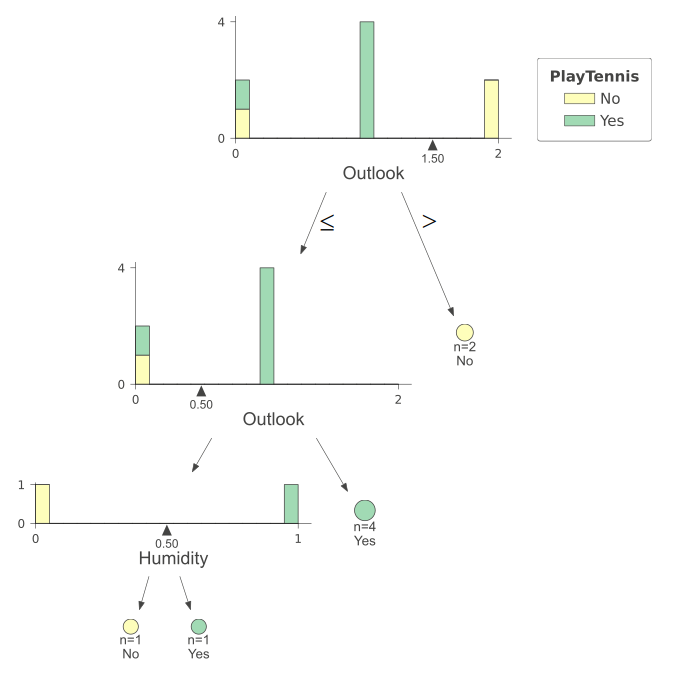

In [171]:
## Decision Tree의 내용 시각화
trees.dtreeviz(spark_dtree, scale = 2.0)